In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import nibabel as nb
import cortex
from linescanning import pycortex,utils,optimal
from prfpy.model import Iso2DGaussianModel

/mnt/export/data1/projects/MicroFunc/Jurjen/programs/packages/prfpy/prfpy/model.py:5: FutureWarning: 

 | Starting with Nilearn 0.7.0, all Nistats functionality has been incorporated into Nilearn's stats & reporting modules.
 | Nistats package will no longer be updated or maintained.

  from nistats.hemodynamic_models import spm_hrf, spm_time_derivative, spm_dispersion_derivative


In [2]:
prf_nordic = utils.get_file_from_substring("task-nordic_model-gauss", opj(os.environ['PRF'],'sub-007'))
prf_standard = utils.get_file_from_substring("task-nonordic_model-gauss", opj(os.environ['PRF'],'sub-007'))

print('nordic pRF:   {}'.format(os.path.basename(prf_nordic)))
print('standard pRF: {}'.format(os.path.basename(prf_standard)))

nordic pRF:   sub-007_ses-1_task-nordic_model-gauss_desc-prf_params.npy
standard pRF: sub-007_ses-1_task-nonordic_model-gauss_desc-prf_params.npy


In [3]:
os.listdir(opj(os.environ['PRF'],'sub-007'))

['sub-007_ses-1_task-nonordic_model-gauss_desc-prf_params.npy',
 'sub-007_ses-1_task-nordic_desc-avg_bold_hemi-L.npy',
 'sub-007_ses-1_task-nonordic_desc-avg_bold_hemi-L.npy',
 'sub-007_desc-polarangle_map.npy',
 'sub-007_ses-1_task-nordic_model-gauss_desc-prf_params.npy',
 'vis_design.mat',
 'sub-007_ses-1_task-nonordic_desc-avg_bold_hemi-R.npy',
 'vis_design.png',
 'sub-007_ses-1_task-nordic_desc-avg_bold_hemi-LR.npy',
 'sub-007_ses-1_task-nordic_desc-avg_bold_hemi-R.npy',
 'sub-007_desc-R2_map.npy',
 'sub-007_desc-eccentricity_map.npy',
 'sub-007_ses-1_task-nonordic_desc-avg_bold_hemi-LR.npy']

In [4]:
ctx_nordic = optimal.CalcBestVertex(subject='sub-007', prf_file=prf_nordic)
ctx_standard = optimal.CalcBestVertex(subject='sub-007', prf_file=prf_standard)

In [ ]:
mean_r2 = (ctx_nordic.prf.r2_v.data+ctx_standard.prf.r2_v.data)/2
diff_r2 = ctx_nordic.prf.r2_v.data-ctx_standard.prf.r2_v.data
cortex.webshow({'standard': ctx_standard.prf.r2_v, 
                'nordic': ctx_nordic.prf.r2_v, 
                'diff': cortex.Vertex(diff_r2*mean_r2, 
                                      subject=ctx_nordic.prf.r2_v.subject, 
                                     cmap='seismic')})

Started server on port 35351


In [47]:
max_r2_nordic = np.max(ctx_nordic.prf.r2[~np.isnan(ctx_nordic.prf.r2)])
max_r2_standard = np.max(ctx_standard.prf.r2[~np.isnan(ctx_standard.prf.r2)])

print(max_r2_nordic)
print(max_r2_standard)

0.7759078145027161
0.7749466300010681


In [48]:
cortex.webshow({'standard': ctx_standard.prf.polar_v, 'nordic': ctx_nordic.prf.polar_v})

Started server on port 19323
Stopping server


KeyboardInterrupt: 

In [50]:
ctx_nordic.prf.

<Vertex data for sub-007>

Text(0, 0.5, 'standard r2')

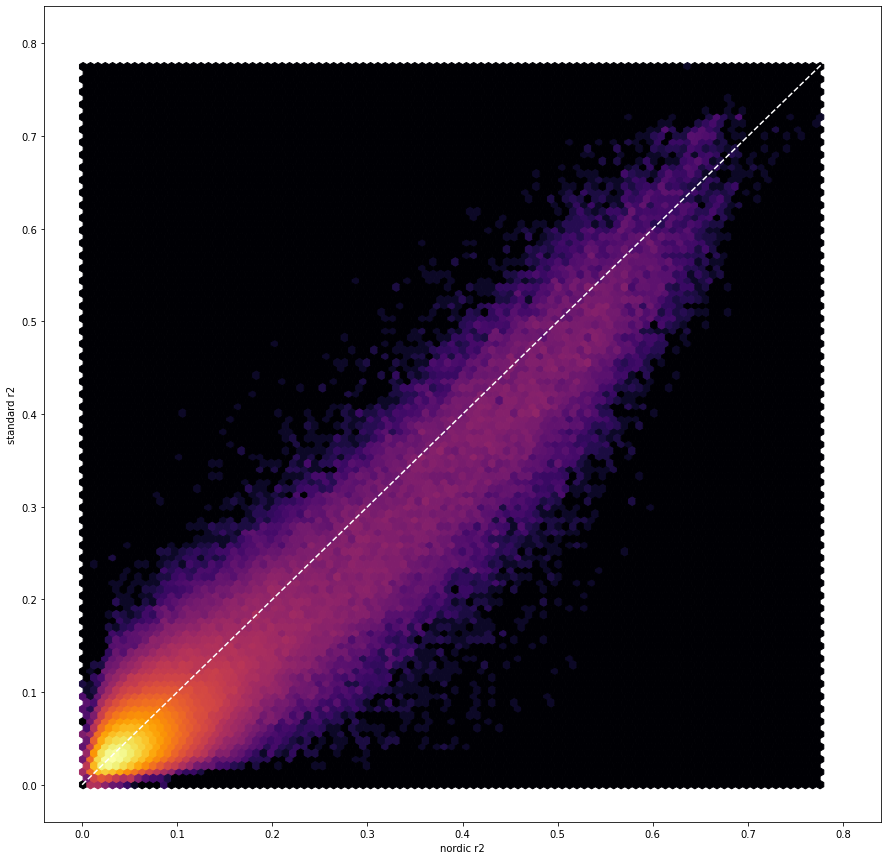

In [61]:
import matplotlib.pyplot as plt
f, ss = plt.subplots(1, 1, figsize=(15,15))
plt.hexbin(ctx_nordic.prf.r2_v.data, ctx_standard.prf.r2_v.data, cmap='inferno', bins='log')
plt.plot([0,0.8], [0,0.8], 'w--')
ss.set_xlabel('nordic r2')
ss.set_ylabel('standard r2')

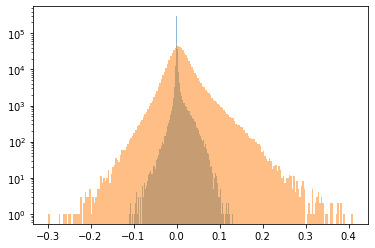

In [67]:
plt.hist(diff_r2*mean_r2, bins=200, log=True, alpha=0.5);
plt.hist(diff_r2, bins=200, log=True, alpha=0.5);

Text(0, 0.5, 'diff r2')

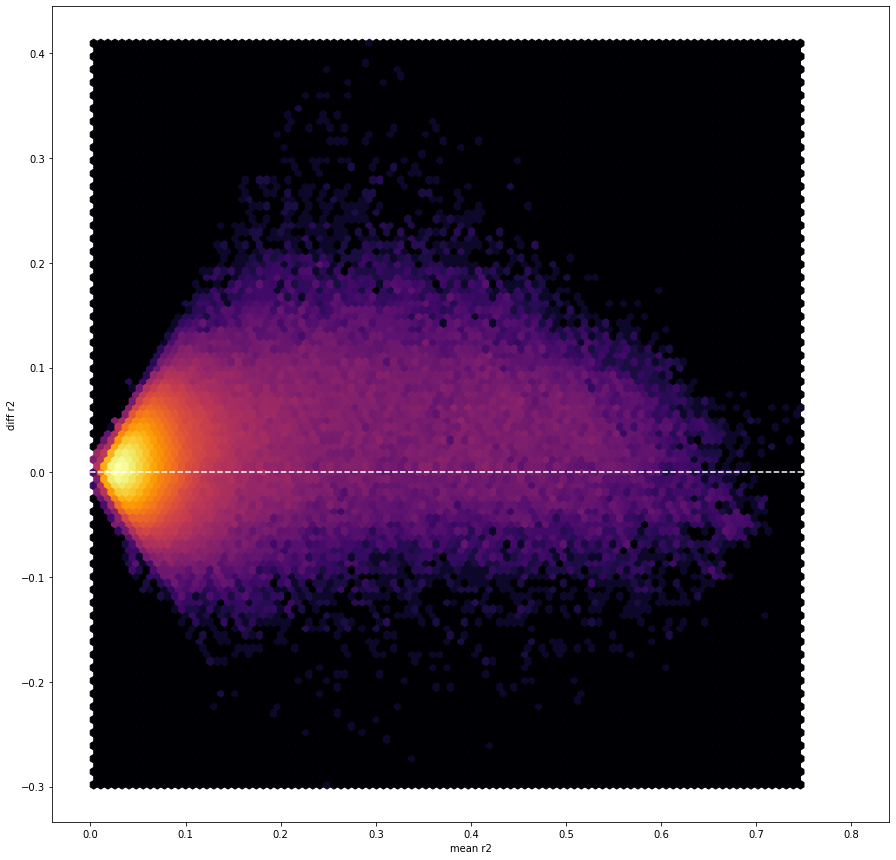

In [69]:
f, ss = plt.subplots(1, 1, figsize=(15,15))
plt.hexbin(mean_r2, diff_r2, cmap='inferno', bins='log')
plt.plot([0,0.8], [0,0], 'w--')
ss.set_xlabel('mean r2')
ss.set_ylabel('diff r2')